In [27]:
import pandas as pd
import numpy as np


In [28]:
data = pd.read_csv('/content/Encoded_car_data.csv')

In [29]:
data

,bt,km,transmission,owner,modelYear,price,place,Insurance Validity,Fuel Type,Seats,Engine Displacement,oem_encoded,num_features,num_Comfort,num_Interior,num_Exterior,frequency_encoded_model,variantName_encoded
0,0.0,120000,0,3,2015,400000,2,0.0,0.0,5,998,20,8,10,7,5,0.018162,0.040268
1,1.0,32706,0,2,2018,811000,2,1.0,0.0,5,1497,6,9,17,12,12,0.019955,0.001673
2,0.0,11949,0,1,2018,585000,2,1.0,0.0,5,1199,29,9,14,12,13,0.011471,0.003226
3,2.0,17794,0,1,2014,462000,2,1.0,0.0,5,1197,9,9,16,10,10,0.006333,0.000239
4,1.0,60000,0,1,2015,790000,2,0.0,1.0,5,1248,20,9,21,11,13,0.003465,0.000358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0.0,10000,0,1,2022,509999,4,0.0,0.0,5,998,20,9,12,9,10,0.018162,0.001434
8365,0.0,120000,0,1,2014,180000,4,0.0,0.0,5,796,20,8,7,7,3,0.019477,0.017326
8366,2.0,50000,1,3,2011,550000,4,0.0,0.0,5,1796,21,9,20,12,20,0.006930,0.000119
8367,0.0,40000,0,1,2012,140000,4,0.0,0.0,5,1197,20,9,12,10,10,0.005257,0.001673


In [30]:
data.isnull().sum()

bt                           4
km                           0
transmission                 0
owner                        0
modelYear                    0
price                        0
place                        0
Insurance Validity           4
Fuel Type                  114
Seats                        0
Engine Displacement          0
oem_encoded                  0
num_features                 0
num_Comfort                  0
num_Interior                 0
num_Exterior                 0
frequency_encoded_model      0
variantName_encoded          0
dtype: int64

In [31]:
data.dropna(subset=['Fuel Type'], inplace=True)

data.dropna(subset=['Insurance Validity'], inplace=True)
data.dropna(subset=['bt'], inplace=True)

In [32]:
X = data.drop('price',axis=1)
y = data['price']

In [33]:
X

,bt,km,transmission,owner,modelYear,place,Insurance Validity,Fuel Type,Seats,Engine Displacement,oem_encoded,num_features,num_Comfort,num_Interior,num_Exterior,frequency_encoded_model,variantName_encoded
0,0.0,120000,0,3,2015,2,0.0,0.0,5,998,20,8,10,7,5,0.018162,0.040268
1,1.0,32706,0,2,2018,2,1.0,0.0,5,1497,6,9,17,12,12,0.019955,0.001673
2,0.0,11949,0,1,2018,2,1.0,0.0,5,1199,29,9,14,12,13,0.011471,0.003226
3,2.0,17794,0,1,2014,2,1.0,0.0,5,1197,9,9,16,10,10,0.006333,0.000239
4,1.0,60000,0,1,2015,2,0.0,1.0,5,1248,20,9,21,11,13,0.003465,0.000358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0.0,10000,0,1,2022,4,0.0,0.0,5,998,20,9,12,9,10,0.018162,0.001434
8365,0.0,120000,0,1,2014,4,0.0,0.0,5,796,20,8,7,7,3,0.019477,0.017326
8366,2.0,50000,1,3,2011,4,0.0,0.0,5,1796,21,9,20,12,20,0.006930,0.000119
8367,0.0,40000,0,1,2012,4,0.0,0.0,5,1197,20,9,12,10,10,0.005257,0.001673


In [34]:
y

0       400000
1       811000
2       585000
3       462000
4       790000
         ...  
8364    509999
8365    180000
8366    550000
8367    140000
8368    500000
Name: price, Length: 8247, dtype: int64

In [35]:
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [36]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6597, 17) (1650, 17) (6597,) (1650,)


In [37]:
X_train

,bt,km,transmission,owner,modelYear,place,Insurance Validity,Fuel Type,Seats,Engine Displacement,oem_encoded,num_features,num_Comfort,num_Interior,num_Exterior,frequency_encoded_model,variantName_encoded
5939,2.0,80000,0,2,2009,5,0.0,0.0,5,1586,20,9,14,9,6,0.001195,0.040268
8003,0.0,50000,0,1,2018,4,0.0,1.0,5,1186,9,9,13,8,7,0.031067,0.000478
1008,0.0,80000,0,2,2017,2,0.0,1.0,5,1248,20,9,12,10,6,0.041821,0.000597
1706,1.0,30742,0,1,2018,3,0.0,0.0,5,1199,8,9,21,12,15,0.009798,0.006094
1170,0.0,70000,0,3,2009,2,0.0,0.0,5,995,2,8,9,7,3,0.001434,0.000956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,50000,0,1,2021,4,0.0,1.0,5,1493,13,9,23,13,19,0.011351,0.000836
5550,1.0,30000,0,1,2021,1,0.0,1.0,5,1497,29,9,10,10,8,0.010515,0.000239
5260,3.0,120000,0,2,2013,1,0.0,1.0,7,2494,30,9,7,6,2,0.006691,0.000597
5317,1.0,109271,0,1,2019,1,1.0,1.0,5,1248,20,9,12,9,8,0.011112,0.003943


**Building Machine Learning Model**

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

*Linear regression*

In [39]:
from sklearn.linear_model import LinearRegression #import
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[1911189.8348355  1959176.7982173   584756.6514672  ... 4537301.31251654
 -340797.37565756  186179.64153913]
2083     2100000
1597     1950000
5622      383000
5616      175000
5351      400000
          ...   
584        58000
7183      360000
3223    15500000
2860      316000
1139      349000
Name: price, Length: 1650, dtype: int64


In [41]:
linear_model.score(X_test, y_test)

0.4869249683078285

In [42]:
from sklearn.model_selection import cross_val_score
# synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.48612735069609236

 **K Nearest Neighbor Regression**

In [ ]:
#Choosing the best K(neighbor) Value

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  0.9998230492233072 cross_val_score :  0.7417373415795152
K value :  2  train score :  0.9435125794441825 cross_val_score :  0.7224187919344687
K value :  3  train score :  0.8918753503412816 cross_val_score :  0.672444556929263
K value :  4  train score :  0.8402974104940016 cross_val_score :  0.7090397034888595
K value :  5  train score :  0.8111021339552285 cross_val_score :  0.7095850405470533
K value :  6  train score :  0.7967655013158226 cross_val_score :  0.7073939005900234
K value :  7  train score :  0.7792142473839444 cross_val_score :  0.72571635311396
K value :  8  train score :  0.7913123289619975 cross_val_score :  0.7354559187599705
K value :  9  train score :  0.7796722429263742 cross_val_score :  0.7413288079434142
K value :  10  train score :  0.7759080353490087 cross_val_score :  0.7353422481833949
K value :  11  train score :  0.7656641352458214 cross_val_score :  0.7273576690375854
K value :  12  train score :  0.7572402824157293 cross_

In [45]:
cross_val_knn_regressor=max(cross_val_knn)
print("The best K-Value is 1 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 1 and Cross_val_score is 0.7417373415795152


In [46]:
#Implementing K Nearest Neighbor Regression

knn_regressor=KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=3)

In [47]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.7141622475873103

 **Decision Tree Regression**

In [48]:
#Choosing the best of depth Value
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())

Depth :  1  train Score  :  0.2614814536651947 cross_val_score :  0.2881492127875343
Depth :  2  train Score  :  0.4269579983546187 cross_val_score :  0.4305765607289276
Depth :  3  train Score  :  0.5807730111491096 cross_val_score :  0.39030518193009817
Depth :  4  train Score  :  0.7152209497515098 cross_val_score :  0.43691036618637574
Depth :  5  train Score  :  0.8174586426723184 cross_val_score :  0.5909181231522614
Depth :  6  train Score  :  0.8830353975787205 cross_val_score :  0.564881117237644
Depth :  7  train Score  :  0.9195761405258247 cross_val_score :  0.5999322307063648
Depth :  8  train Score  :  0.9445549969963108 cross_val_score :  0.5445787951926996
Depth :  9  train Score  :  0.9596644886791768 cross_val_score :  0.4023018718718677
Depth :  10  train Score  :  0.9719614429958727 cross_val_score :  0.5222216734003103
Depth :  11  train Score  :  0.9808547742715641 cross_val_score :  0.345963111796726
Depth :  12  train Score  :  0.9861732425758464 cross_val_score

In [50]:
cross_val_dt_regressor=max(cross_val_dt)
cross_val_dt_regressor

0.6483072356975288

In [51]:
print("The best depth is 15 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 15 and Cross_val_score is: 0.6483072356975288


In [52]:
#Implementing Decision Tree Regression

dt_regressor=DecisionTreeRegressor(max_depth=14, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=14, random_state=0)

In [53]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.42216055064167285

In [55]:
ftImp = list(zip(dt_regressor.feature_importances_, data.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
9,0.425978,Seats
12,0.191034,num_features
1,0.111053,km
4,0.070664,modelYear
10,0.051470,Engine Displacement
15,0.035789,num_Exterior
16,0.029856,frequency_encoded_model
2,0.020383,transmission
14,0.016363,num_Interior
13,0.015932,num_Comfort


**Random Forest Regression**

In [56]:
#Choosing the best depth value
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.5376395436553456
Depth :  4 cross_val_score :  0.7152104593643834
Depth :  8 cross_val_score :  0.8225327105151372
Depth :  10 cross_val_score :  0.8389792690926664
Depth :  11 cross_val_score :  0.8375722711873851
Depth :  12 cross_val_score :  0.8425812698218813
Depth :  13 cross_val_score :  0.8448885699478094
Depth :  15 cross_val_score :  0.8472518732227066
Depth :  18 cross_val_score :  0.8488774871771254
Depth :  20 cross_val_score :  0.8452907973187861


In [57]:
cross_val_rf_regressor = max(cross_val_rf)
cross_val_rf_regressor


0.8488774871771254

In [59]:
print("The best depth is 18 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 18 and Cross_val_score is: 0.8488774871771254


*Implementing Random Forest Regression*

In [60]:
rf_regressor=RandomForestRegressor(max_depth=20, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [61]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.8452907973187861

** Extreme Gradient Boosting Regression**

In [62]:
#Choosing the best Learning Rate
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.6701415004651269
Learning rate :  0.05 cross_val_score: 0.8135729322203351
Learning rate :  0.08 cross_val_score: 0.8267451059279567
Learning rate :  0.1 cross_val_score: 0.8357065209329042
Learning rate :  0.2 cross_val_score: 0.8378985142103941
Learning rate :  0.25 cross_val_score: 0.8498115523589627
Learning rate :  0.3 cross_val_score: 0.8321280454373503


In [63]:
cross_val_xgb_regressor = max(cross_val_xgb)
cross_val_xgb_regressor

0.8498115523589627

In [64]:
print("The best Learning rate is 0.1 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.1 and Cross_val_score is: 0.8498115523589627


*Implementing Extreme Gradient Boosting Regression*

In [65]:
xgb_regressor= xgb.XGBRegressor(learning_rate =0.1,n_estimators=100) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Cross-Validation Score for Machine-Learning Models**

In [66]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.48612735069609236
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.7141622475873103
Cross Validation Score for Decision Tree Regression Model:  0.42216055064167285
Cross Validation Score for Random Forest Regression Model:  0.8452907973187861
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.8498115523589627


**R2 Score for Machine-Learning Models**

In [67]:
from sklearn.metrics import r2_score

In [68]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [69]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [70]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.4869249683078285
R2 Score for K-Nearest Neighbors Regression Model: -0.7694248437329803
R2 Score for Decision Tree Regression Model:  0.5310467687086868
R2 Score for Random Forest Regression Model:  0.7450483482506458
R2 Score for Extreme-Gradient Boosting Regression Model:  0.7729575491057336


# **Suggestion to Sellers and buyers-Solving problem statements based on Feature Importance**

In [71]:
import matplotlib.pyplot as plt

In [72]:
xgb_regressor.feature_importances_

array([0.01901063, 0.10341357, 0.08091197, 0.00185469, 0.07768536,
       0.00719528, 0.00472533, 0.01501197, 0.01081408, 0.3676223 ,
       0.01292129, 0.00050781, 0.1768935 , 0.04406697, 0.03272497,
       0.03996463, 0.00467573], dtype=float32)

In [73]:
data.columns

Index(['bt', 'km', 'transmission', 'owner', 'modelYear', 'price', 'place',
       'Insurance Validity', 'Fuel Type', 'Seats', 'Engine Displacement',
       'oem_encoded', 'num_features', 'num_Comfort', 'num_Interior',
       'num_Exterior', 'frequency_encoded_model', 'variantName_encoded'],
      dtype='object')

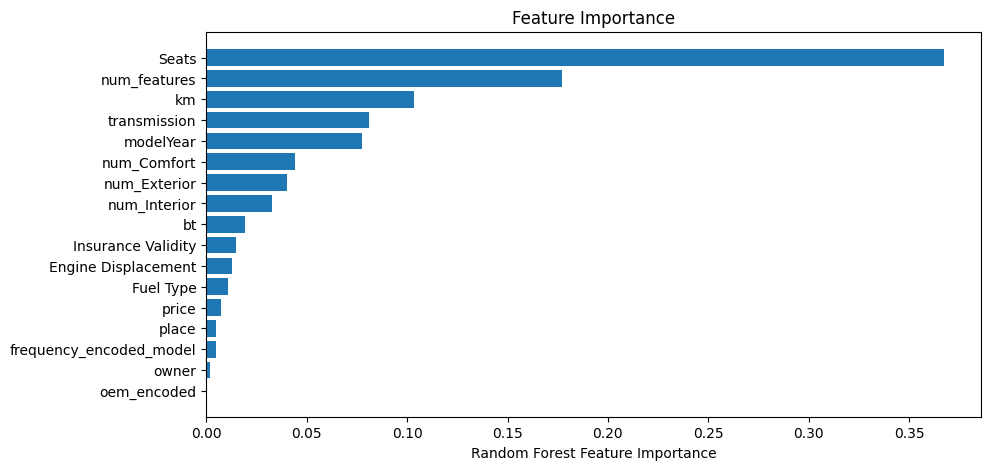

In [75]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(data.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()